In [1]:
import pandas as pd
import pickle as pickle
import numpy as np
from datetime import datetime
from datetime import date
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
import os


pd.set_option('display.max_columns', None)

In [24]:
# Background graph style
sns.set(style="darkgrid")
# ==============
# Chouse color
# ==============
sns.palplot(sns.color_palette("muted"))  # show color
sns.set_palette("muted") # for seaborn
colors = sns.color_palette("muted") # for pyplot

### Functios

In [7]:
def barprop(yvalue, xvalue, stitle, size, data):
    table=pd.crosstab(data[xvalue],data[yvalue])
    ax = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=size)
    
    
    if len(stitle)==0: # default title
        stitle = "Proportion bar graph"
    
    plt.title(stitle)
    plt.xlabel(xvalue)
    plt.ylabel(yvalue)
    plt.legend(data[yvalue].unique(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pass

In [8]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

In [9]:
# =========================
#  Histogram
# =========================
def simpleHistGraph(numvar,  data, bins=10):
    g = data[numvar].hist(bins=bins)
    g.set_title(numvar +" distribucion ")
    pass

In [10]:
def countBarPlot(catvar, data, scale="linear", orient="h", rot=0, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    g = sns.countplot(x = catvar, data=data, orient=orient)
    loc, labels = plt.xticks()
    g.set_xticklabels(labels, rotation=rot)
    g.set_yscale(scale)
    
    g.set_title("Number of cases by " + catvar.upper())
    plt.show()
    pass

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('../../data/raw/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../data/raw/productos.csv
../../data/raw/censo_train.csv
../../data/raw/censo_test.csv
../../data/raw/y_train.csv
../../data/raw/sample_submission.csv
../../data/raw/sunat_train.csv
../../data/raw/se_train.csv
../../data/raw/se_test.csv
../../data/raw/rcc_test.csv
../../data/raw/rcc_train.csv
../../data/raw/interbank20.zip
../../data/raw/sunat_test.csv


### Descripción de los datos
En todos los archivos, la columna "key_value" corresponde a la identificación ofuscada de la persona, pero los ids no son compatibles entre conjuntos de datos (train|test). Es decir, el key_value = 1 de rcc_train no es la misma persona que el key_value = 1 de rcc_test.

    


**rcc_[train|test].csv**: historial crediticio
+ codmes: año y mes de la observación
+ condicion: dias de atraso
+ tipo_credito: tipo de credito
+ cod_instit_financiera: codigo de la institución financiera otorgante
+ saldo: monto de línea o adeudado
+ PRODUCTO: tipo de producto, para la descripción cruzar con productos.csv
+ RIESGO_DIRECTO: un indicador ordinal del riesgo de la persona
+ COD_CLASIFICACION_DEUDOR: un indicador categórico del riesgo de la persona

In [3]:
rcc_train = pd.read_csv("../../data/raw/rcc_train.csv")

In [79]:
bins = [-1, 0, 10, 20, 30, 60, 90, 180, 360, 720, float("inf")]
rcc_train["condicion_bin"] = pd.cut(rcc_train.condicion, bins)

In [11]:
rcc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30391626 entries, 0 to 30391625
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   codmes                    int64  
 1   key_value                 int64  
 2   condicion                 int64  
 3   tipo_credito              int64  
 4   cod_instit_financiera     int64  
 5   saldo                     float64
 6   PRODUCTO                  int64  
 7   RIESGO_DIRECTO            int64  
 8   COD_CLASIFICACION_DEUDOR  int64  
dtypes: float64(1), int64(8)
memory usage: 2.0 GB


In [5]:
rcc_train.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201711,4,0,12,33,-0.072601,6,-1,0
1,201711,4,0,12,33,-0.070608,7,-1,0
2,201711,4,0,12,61,-0.052054,5,-1,0
3,201711,4,0,11,32,-0.072456,8,1,0
4,201711,4,0,12,61,-0.057877,0,1,0


In [13]:
rcc_train.describe().T # numerical data

,count,mean,std,min,25%,50%,75%,max
codmes,30391626.0,2.017257e+05,37.130381,201703.000000,201706.000000,201709.000000,201712.000000,201802.000000
key_value,30391626.0,1.730234e+05,101436.547446,0.000000,84838.000000,172388.000000,259210.000000,358486.000000
condicion,30391626.0,1.438200e+01,186.351144,0.000000,0.000000,0.000000,0.000000,9999.000000
tipo_credito,30391626.0,1.159850e+01,7.581905,6.000000,11.000000,11.000000,11.000000,99.000000
cod_instit_financiera,30391626.0,2.143093e+01,17.695956,0.000000,3.000000,18.000000,34.000000,108.000000
saldo,30391626.0,-3.838222e-18,1.000000,-0.072892,-0.072332,-0.063934,-0.033075,1891.015714
PRODUCTO,30391626.0,1.923337e+01,59.513419,0.000000,1.000000,3.000000,8.000000,255.000000
RIESGO_DIRECTO,30391626.0,-4.401513e-01,0.906344,-1.000000,-1.000000,-1.000000,1.000000,5.000000
COD_CLASIFICACION_DEUDOR,30391626.0,1.112843e-01,0.583196,0.000000,0.000000,0.000000,0.000000,5.000000


In [14]:
print(rcc_train.nunique())

codmes                          12
key_value                   358487
condicion                     7245
tipo_credito                     8
cod_instit_financiera          109
saldo                       190285
PRODUCTO                        42
RIESGO_DIRECTO                   5
COD_CLASIFICACION_DEUDOR         6
dtype: int64


In [15]:
print(rcc_train.isnull().sum())

codmes                      0
key_value                   0
condicion                   0
tipo_credito                0
cod_instit_financiera       0
saldo                       0
PRODUCTO                    0
RIESGO_DIRECTO              0
COD_CLASIFICACION_DEUDOR    0
dtype: int64


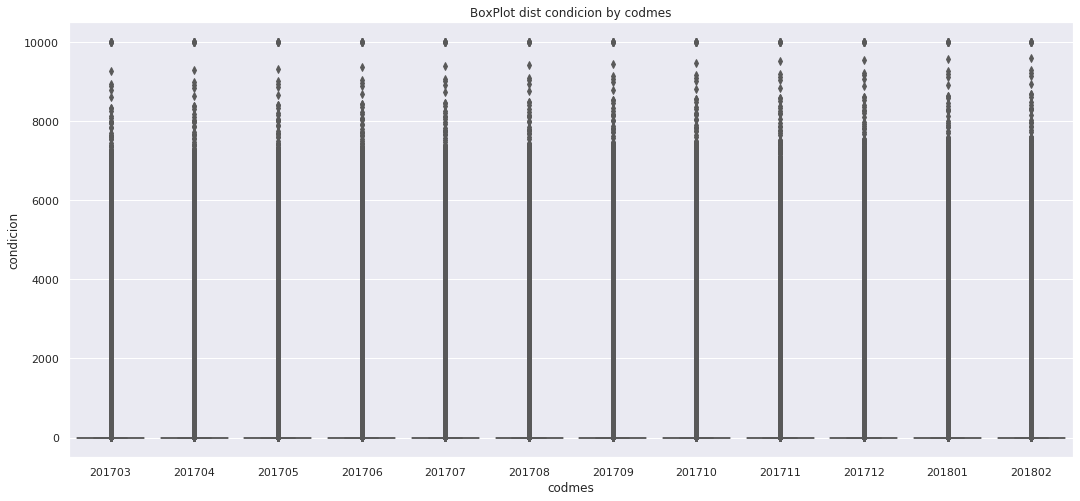

In [25]:
# ====================
#  Boxplot
# ====================
plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='codmes', y="condicion", 
                 #hue = "catvar or target",
                 orient="v",  # "v" | "h", optional
                 linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist condicion by codmes")
# Tweak the visual presentation
# ax.xaxis.grid(True)
ax.yaxis.grid(True)
pass

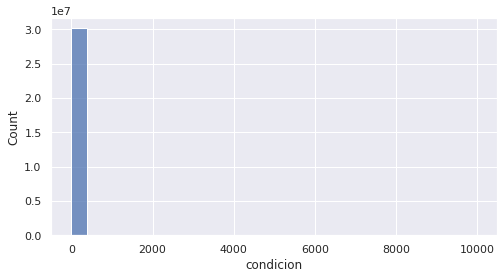

In [81]:
plt.figure(figsize=(8, 4))
sns.set(style="darkgrid")
sns.histplot(data=rcc_train, x="condicion")
pass

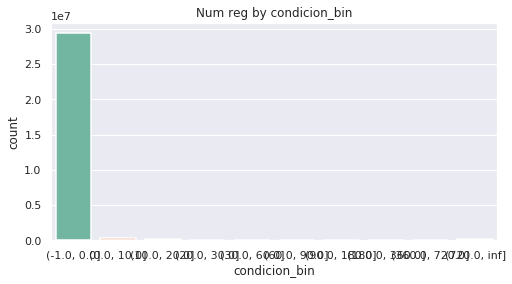

In [82]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="condicion_bin",linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by condicion_bin")
pass

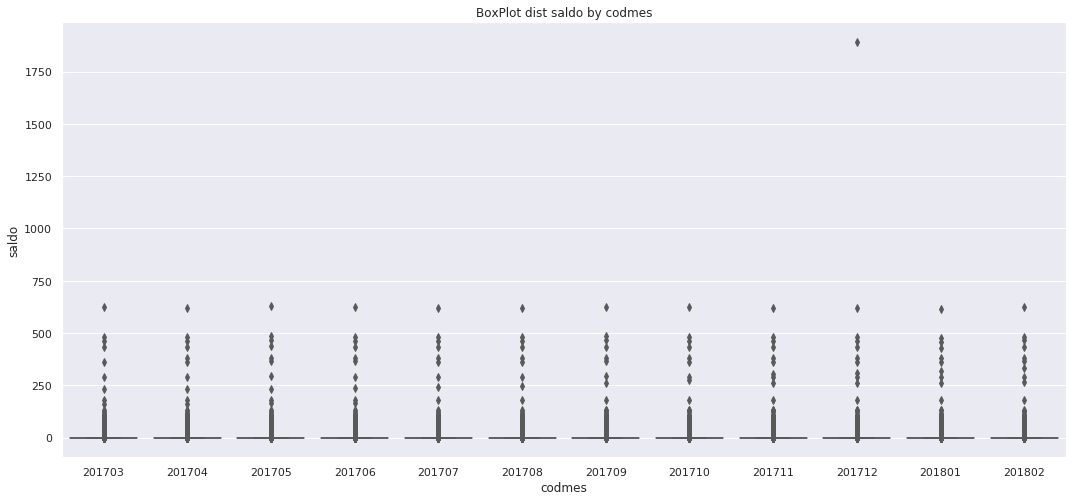

In [26]:
# ====================
#  Boxplot
# ====================
plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='codmes', y="saldo", 
                 #hue = "catvar or target",
                 orient="v",  # "v" | "h", optional
                 linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist saldo by codmes")
# Tweak the visual presentation
# ax.xaxis.grid(True)
ax.yaxis.grid(True)
pass

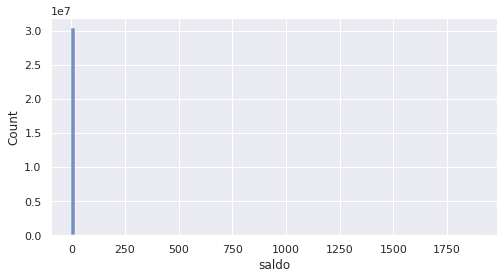

In [54]:
plt.figure(figsize=(8, 4))
sns.set(style="darkgrid")
sns.histplot(data=rcc_train, x="saldo", bins=100)
pass

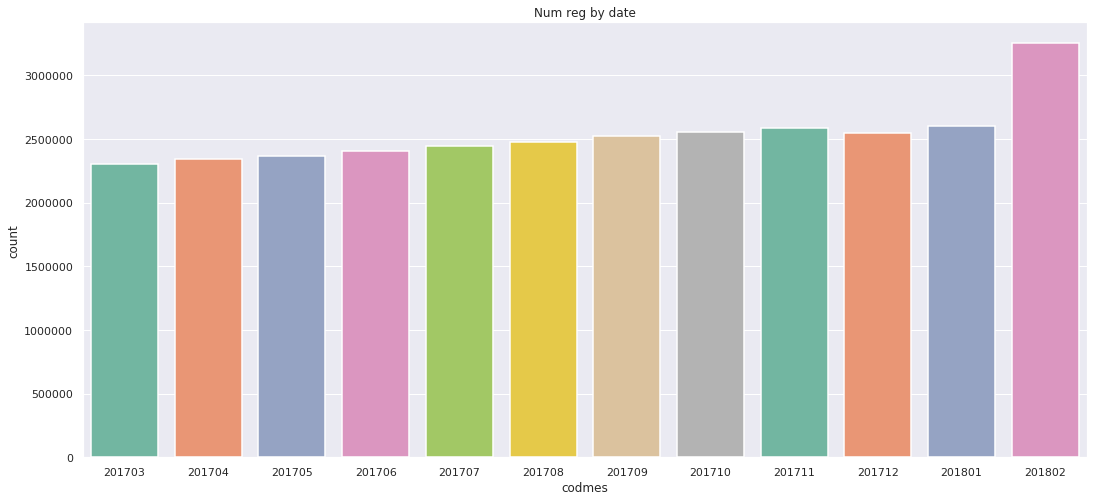

In [52]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(x="codmes",linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by date")
pass

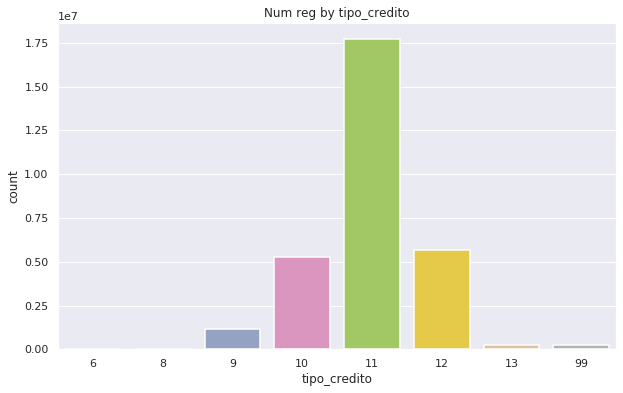

In [56]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="tipo_credito",linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by tipo_credito")
pass

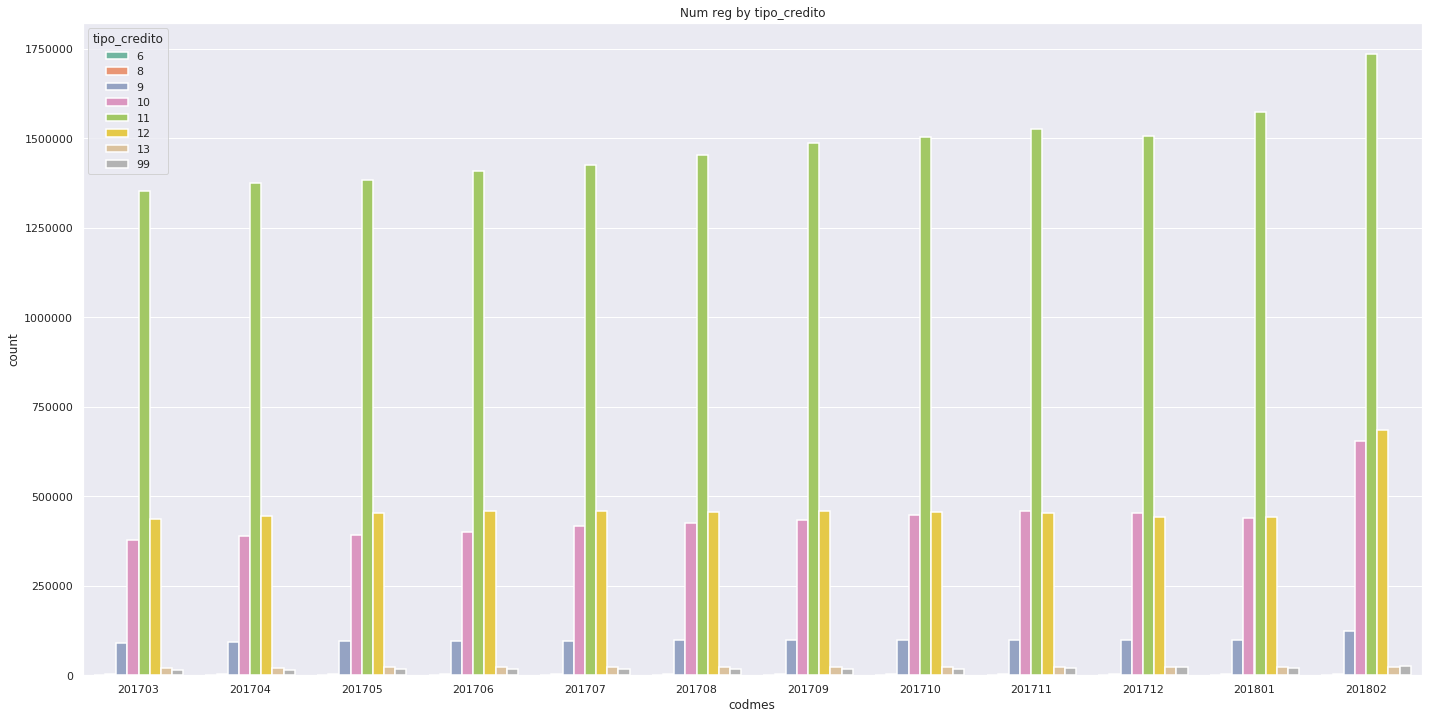

In [60]:
plt.figure(figsize=(24, 12))
ax = sns.countplot(x="codmes",linewidth=1.5,hue="tipo_credito",
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by tipo_credito")
pass

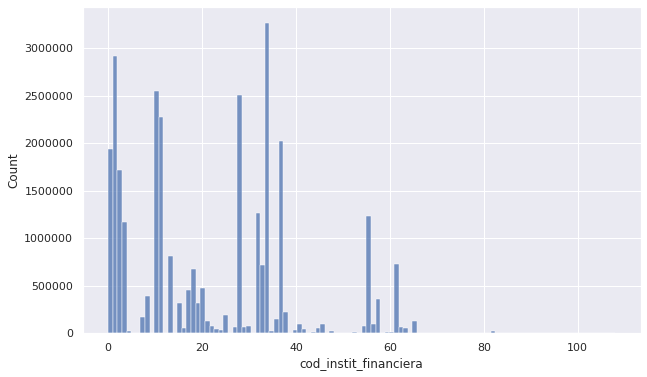

In [65]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.histplot(data=rcc_train, x="cod_instit_financiera", bins=110)
pass

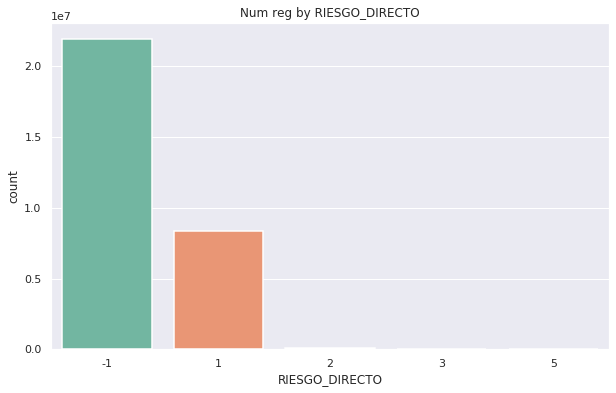

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="RIESGO_DIRECTO",linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by RIESGO_DIRECTO")
pass

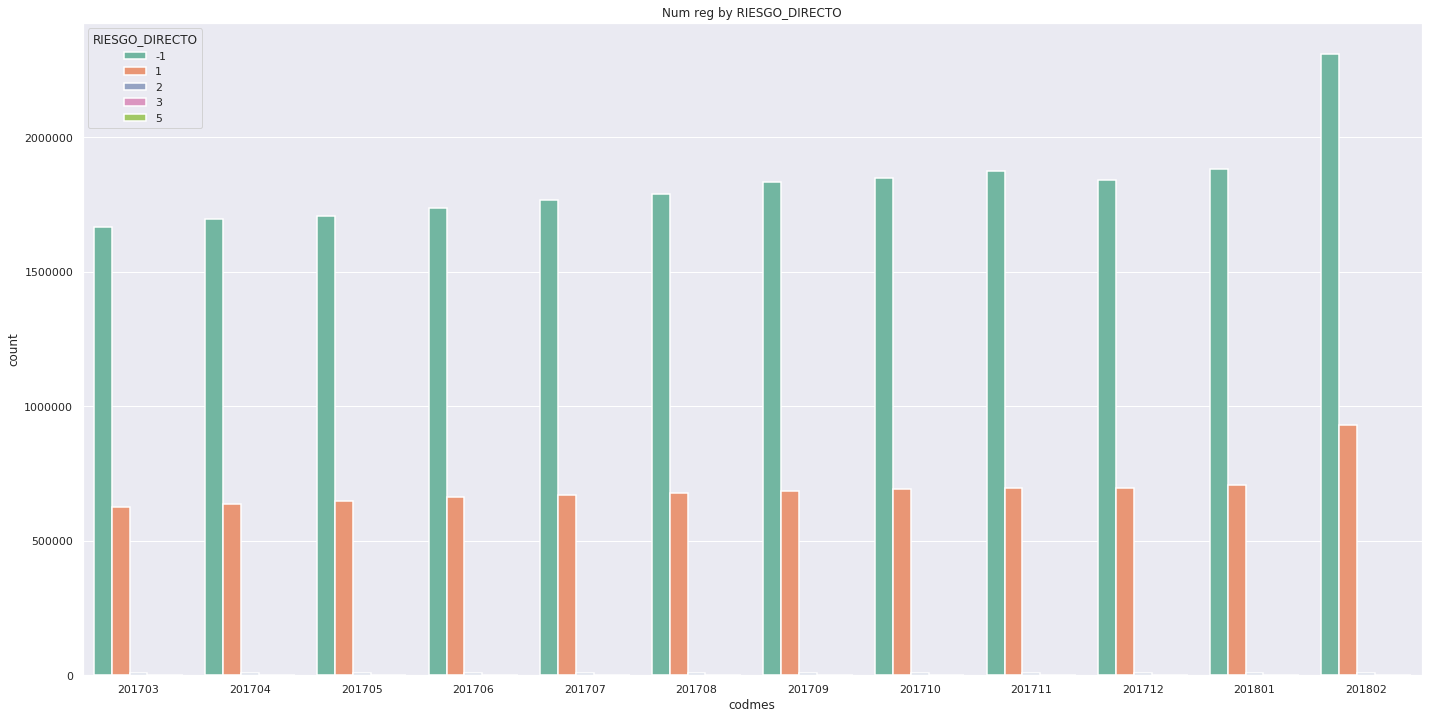

In [73]:
plt.figure(figsize=(24, 12))
ax = sns.countplot(x="codmes",linewidth=1.5,hue="RIESGO_DIRECTO",
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by RIESGO_DIRECTO")
pass

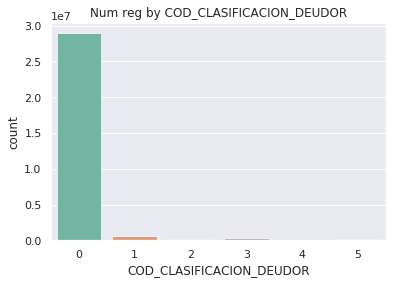

In [75]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="COD_CLASIFICACION_DEUDOR",linewidth=.7,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by COD_CLASIFICACION_DEUDOR")
pass

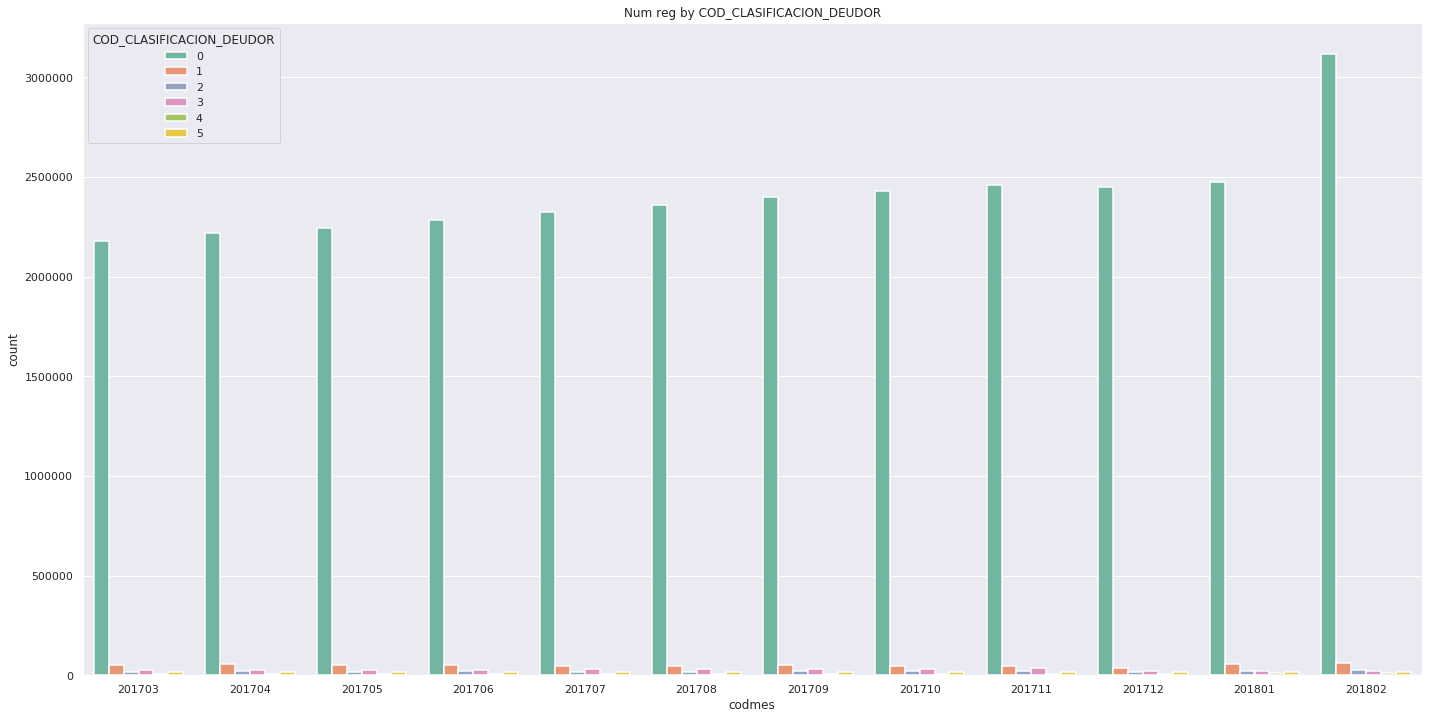

In [76]:
plt.figure(figsize=(24, 12))
ax = sns.countplot(x="codmes",linewidth=1.5,hue="COD_CLASIFICACION_DEUDOR",
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_train).set_title("Num reg by COD_CLASIFICACION_DEUDOR")
pass

In [42]:
rcc_test = pd.read_csv("../../data/raw/rcc_test.csv")

In [84]:
rcc_test["condicion_bin"] = pd.cut(rcc_test.condicion, bins)

In [43]:
rcc_test.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201811,1103,0,10,28.0,-0.072825,1.0,-1,0
1,201811,1103,0,10,28.0,-0.072881,5.0,-1,0
2,201811,1103,0,10,28.0,-0.065838,4.0,1,0
3,201811,1103,0,10,28.0,-0.072881,NaN,-1,0
4,201811,1104,0,13,3.0,0.583493,19.0,1,0


In [44]:
rcc_test.describe().T # numerical data

,count,mean,std,min,25%,50%,75%,max
codmes,34351754.0,201825.785648,37.187570,201803.000000,201806.000000,201809.000000,201812.000000,201902.000000
key_value,34351754.0,189390.533912,111620.679985,0.000000,92110.000000,187760.500000,284291.000000,396665.000000
condicion,34351754.0,17.497493,207.891918,0.000000,0.000000,0.000000,0.000000,9999.000000
tipo_credito,34351754.0,11.694141,8.182281,6.000000,11.000000,11.000000,11.000000,99.000000
cod_instit_financiera,34351420.0,21.798270,17.826888,0.000000,7.000000,18.000000,34.000000,108.000000
saldo,34351754.0,0.001114,1.155592,-0.072892,-0.072377,-0.064102,-0.032067,1748.834149
PRODUCTO,31923272.0,4.316302,4.068878,0.000000,1.000000,3.000000,6.000000,41.000000
RIESGO_DIRECTO,34351754.0,-0.439367,0.907892,-1.000000,-1.000000,-1.000000,1.000000,5.000000
COD_CLASIFICACION_DEUDOR,34351754.0,0.114218,0.612602,0.000000,0.000000,0.000000,0.000000,5.000000


In [45]:
print(rcc_test.nunique())

codmes                          12
key_value                   396666
condicion                     7806
tipo_credito                     9
cod_instit_financiera           96
saldo                       207996
PRODUCTO                        41
RIESGO_DIRECTO                   5
COD_CLASIFICACION_DEUDOR         6
dtype: int64


In [46]:
print(rcc_test.isnull().sum())

codmes                            0
key_value                         0
condicion                         0
tipo_credito                      0
cod_instit_financiera           334
saldo                             0
PRODUCTO                    2428482
RIESGO_DIRECTO                    0
COD_CLASIFICACION_DEUDOR          0
dtype: int64


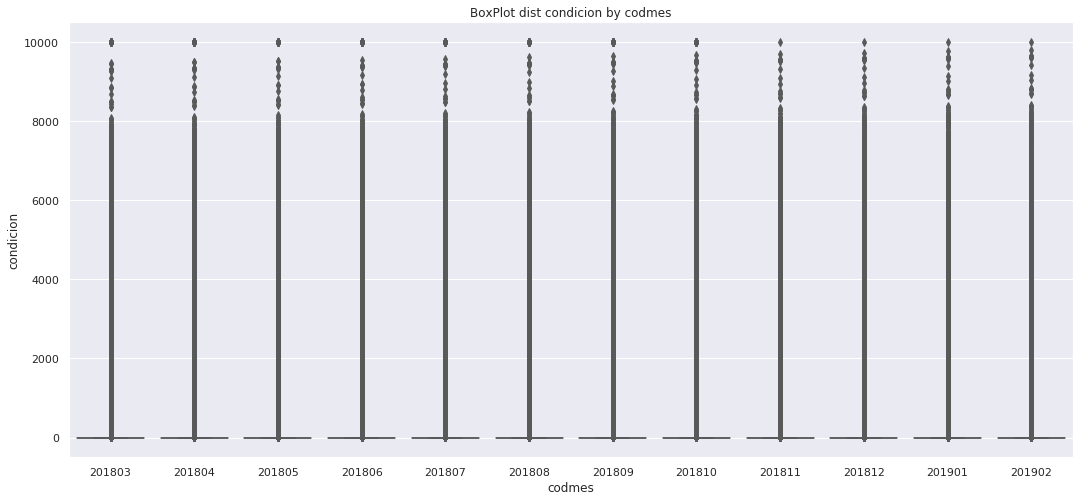

In [47]:
# ====================
#  Boxplot
# ====================
plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='codmes', y="condicion", 
                 #hue = "catvar or target",
                 orient="v",  # "v" | "h", optional
                 linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist condicion by codmes")
# Tweak the visual presentation
# ax.xaxis.grid(True)
ax.yaxis.grid(True)
pass

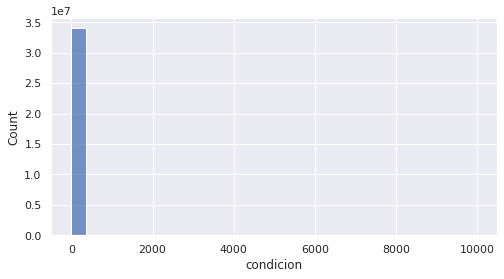

In [48]:
plt.figure(figsize=(8, 4))
sns.set(style="darkgrid")
sns.histplot(data=rcc_test, x="condicion")
pass

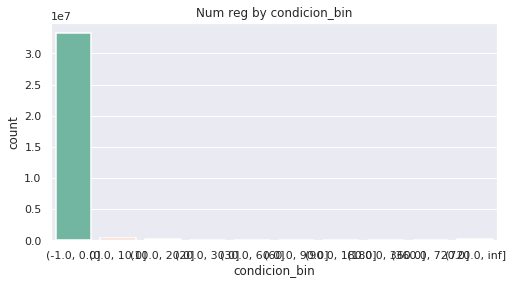

In [85]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="condicion_bin",linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by condicion_bin")
pass

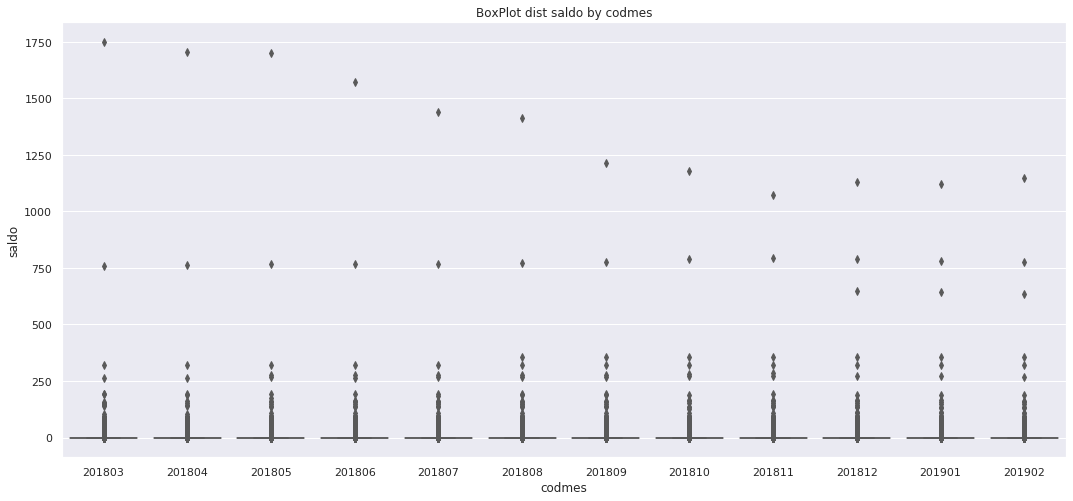

In [49]:
# ====================
#  Boxplot
# ====================
plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='codmes', y="saldo", 
                 #hue = "catvar or target",
                 orient="v",  # "v" | "h", optional
                 linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist saldo by codmes")
# Tweak the visual presentation
# ax.xaxis.grid(True)
ax.yaxis.grid(True)
pass

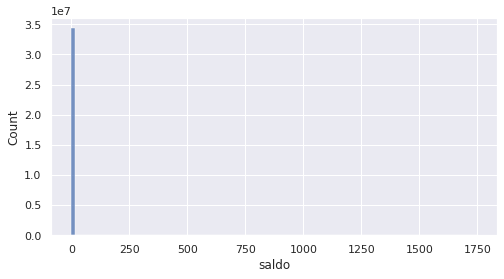

In [50]:
plt.figure(figsize=(8, 4))
sns.set(style="darkgrid")
sns.histplot(data=rcc_test, x="saldo", bins=100)
pass

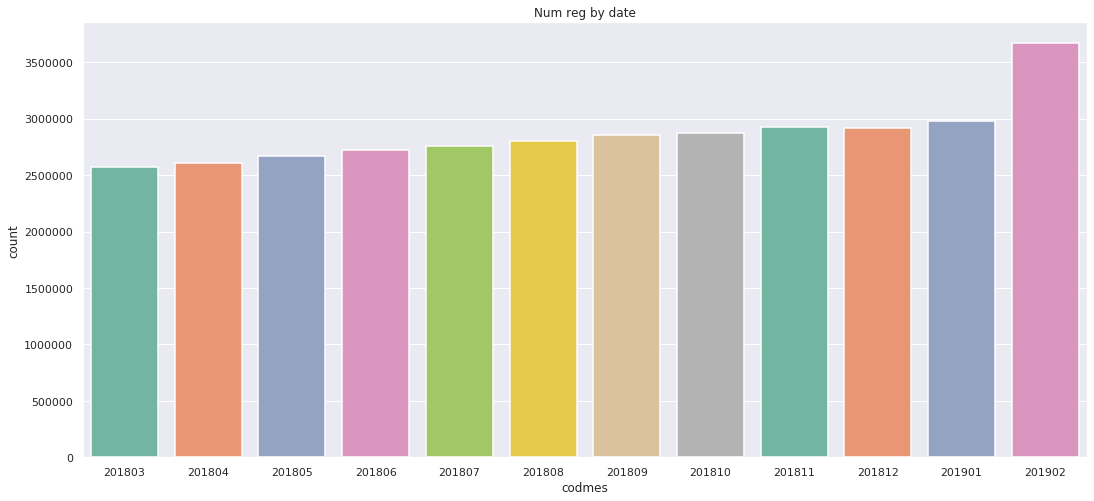

In [53]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(x="codmes",          linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by date")
pass

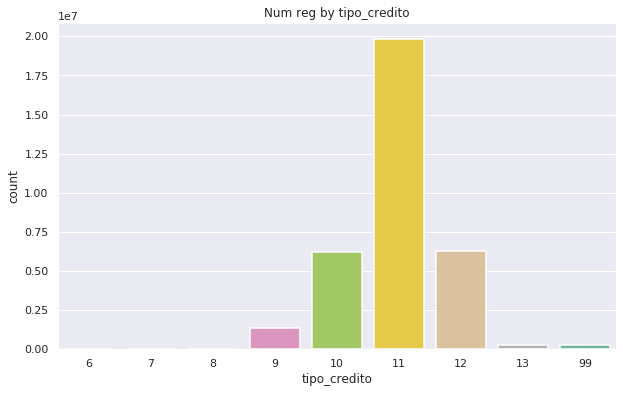

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="tipo_credito",linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by tipo_credito")
pass

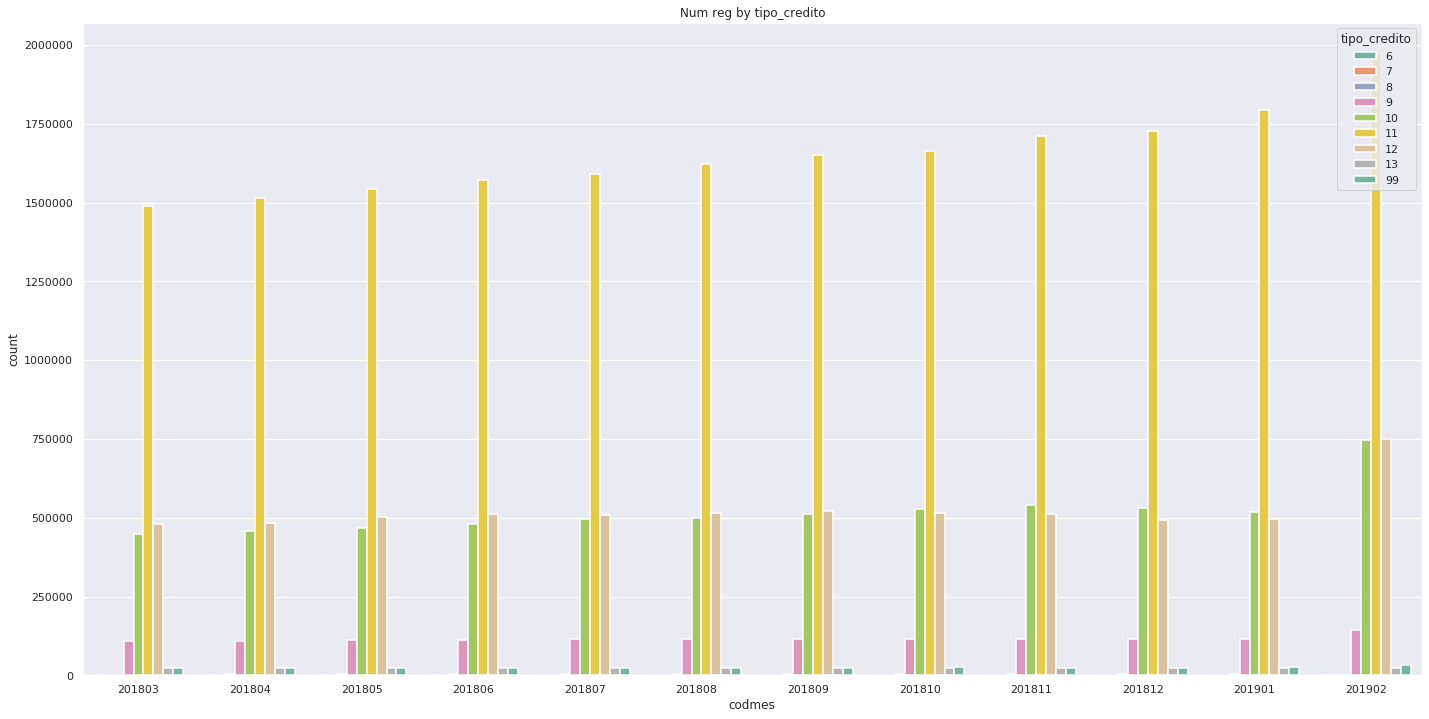

In [62]:
plt.figure(figsize=(24, 12))
ax = sns.countplot(x="codmes",linewidth=1.5,hue="tipo_credito",
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by tipo_credito")
pass

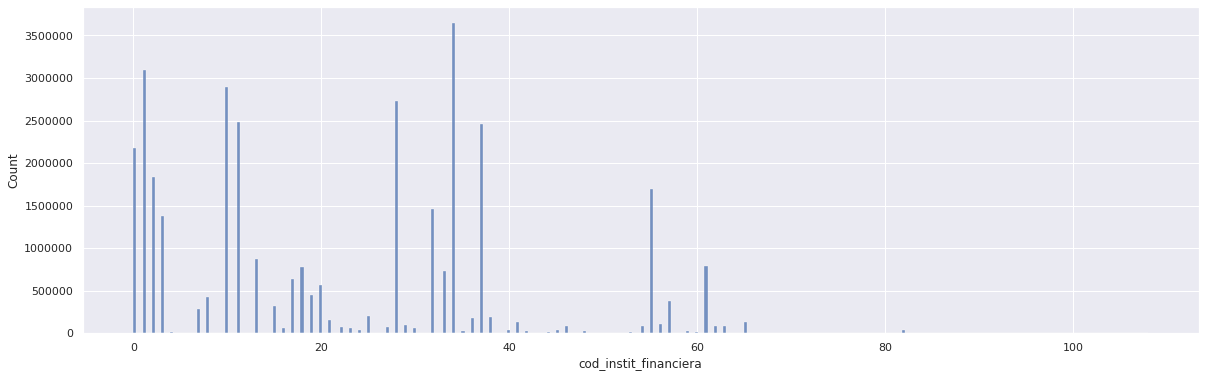

In [68]:
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
sns.histplot(data=rcc_test, x="cod_instit_financiera", bins=334)
pass

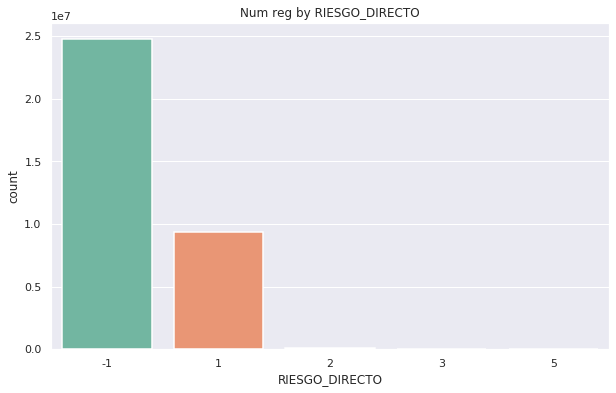

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="RIESGO_DIRECTO",linewidth=1.5,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by RIESGO_DIRECTO")
pass

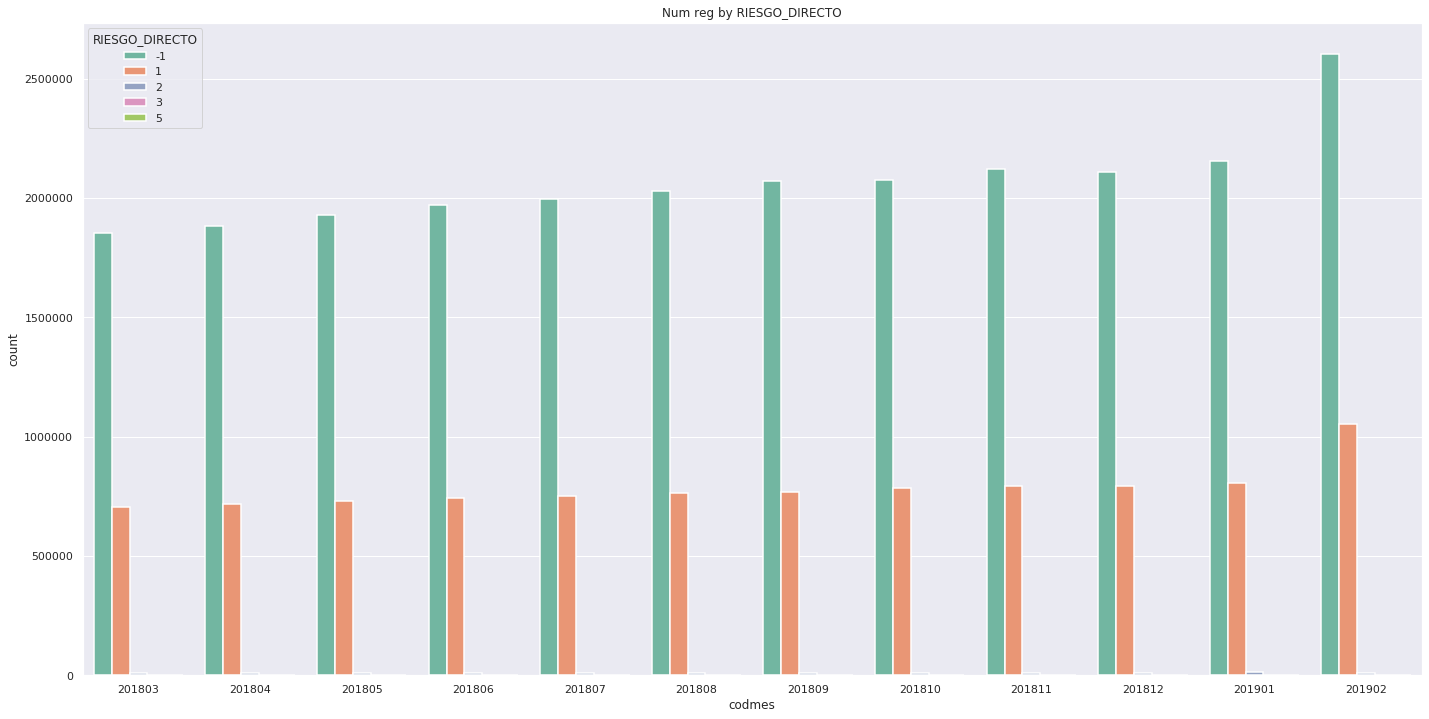

In [71]:
plt.figure(figsize=(24, 12))
ax = sns.countplot(x="codmes",linewidth=1.5,hue="RIESGO_DIRECTO",
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by RIESGO_DIRECTO")
pass

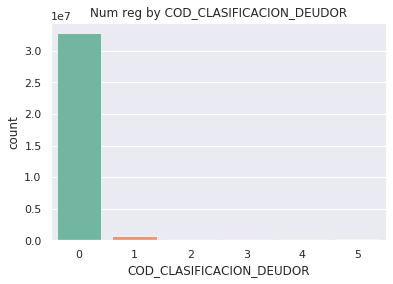

In [77]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="COD_CLASIFICACION_DEUDOR",linewidth=.7,
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by COD_CLASIFICACION_DEUDOR")
pass

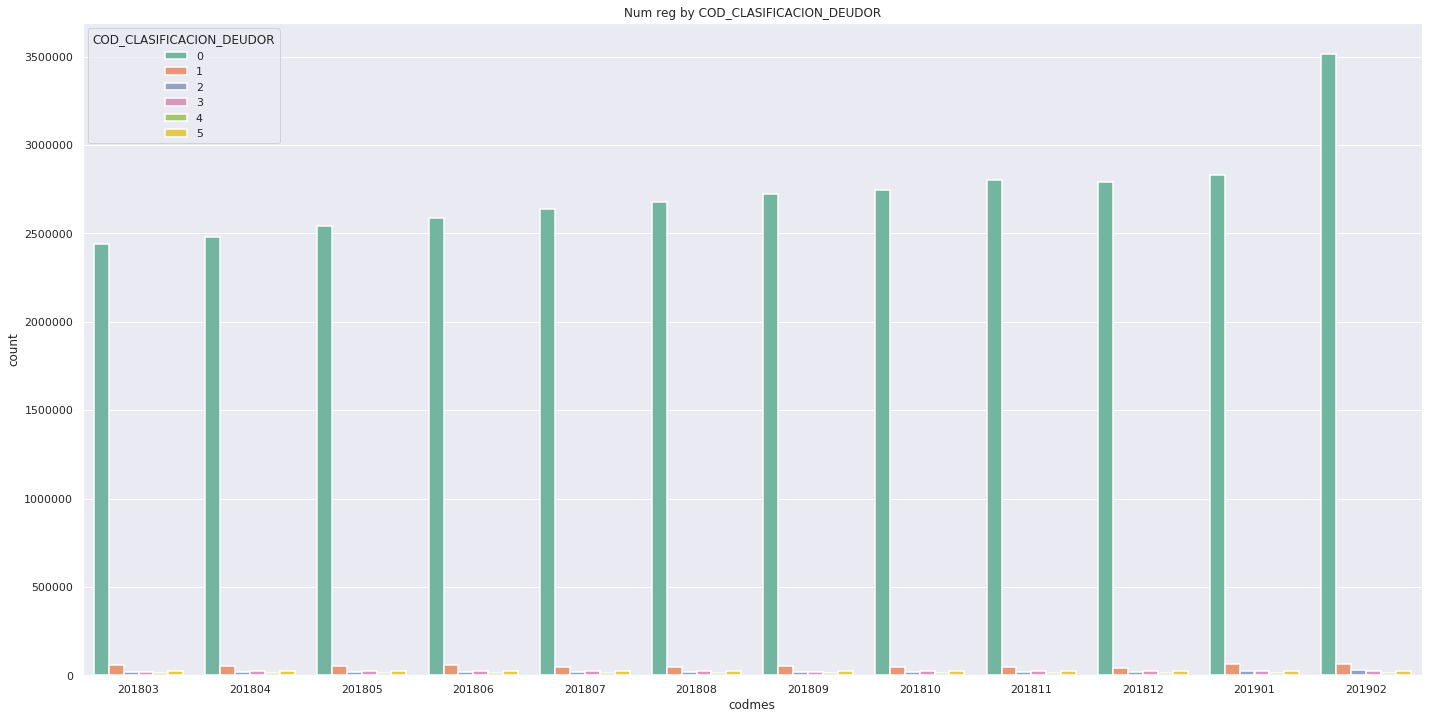

In [78]:
plt.figure(figsize=(24, 12))
ax = sns.countplot(x="codmes",linewidth=1.5,hue="COD_CLASIFICACION_DEUDOR",
                 palette="Set2", # Colors to use for the different levels of the hue variable.
                 data=rcc_test).set_title("Num reg by COD_CLASIFICACION_DEUDOR")
pass